In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
import csv

In [2]:
results_csv = 'newberg_results_for_figs.csv'

In [3]:
acc = defaultdict(list)
models = []

with open(results_csv) as f:
    reader = csv.DictReader(f)
    
    for row in reader:
        model = row['Model']
        models.append(model)
        for key in ("Overall","Curb Ramp","Missing Ramp","Obstruction","Sfc Problem","Null"):
            acc[key].append( float(row[key]) )

In [4]:
models

['Trained on DC',
 'Trained on DC+Newberg',
 'Trained on Newberg',
 'Trained on Newberg, init with DC']

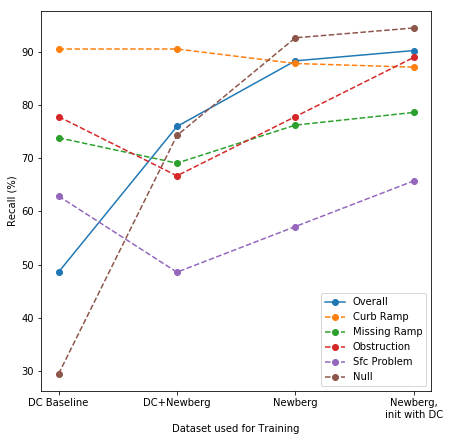

In [5]:
fancy_models = ['DC Baseline', 'DC+Newberg', 'Newberg', 'Newberg,\ninit with DC']

plt.figure(figsize=(7,7))
for label in ('Overall', 'Curb Ramp', 'Missing Ramp', 'Obstruction', 'Sfc Problem', 'Null'):
    line   = 'dashed' if label != 'Overall' else 'solid'
    plt.plot(fancy_models, acc[label], label=label, linestyle=line, marker='o')
plt.xlabel("Dataset used for Training")
plt.ylabel('Recall (%)')
#plt.title("Accuracy on Newberg Data as a function of Training Data")
plt.legend()

plt.show()